# Airline Safety on Bad Weather

## Data Engineering/Science Project

### Project Summary

This project aims to collect and analyse data from Airline Safety and Bad Weather datasets. 

The project follows 3 steps:

1. Scope the project and Gather Data
2. Explore and Access Data
3. Analyse Data

### Import all we need

In [1]:
import pandas as pd
import numpy as np

## Step 1: Scope the project and Gather Data




### Project Scope

In this project we will use two data sources to do the analyses: Airline Safety and Bad Weather.

This data will helps us answer the following questions:
- How many accidents have occurred when the weather has been bad?
- Do we have to fear traveling in flights during bad weather?

### Describe and Gather Data


Data Sources:

- Airline safety data can be found on this github repo: https://github.com/fivethirtyeight/data/tree/master/airline-safety
- Bad Weather can be found on this github repo: 


### Scraping the Data

### Reading the Weather data

In [2]:
cities = ['KCLT', 'KCQT', 'KHOU', 'KIND', 'KJAX', 'KMDW', 'KNYC', 'KPHL', 'KPHX', 'KSEA']

In [3]:
airports = {}
for city in cities:
    airports.update({city: pd.read_csv(f"https://raw.githubusercontent.com/fivethirtyeight/data/master/us-weather-history/{city}.csv")})

In [4]:
KCLT = airports['KCLT']
type(KCLT)

pandas.core.frame.DataFrame

In [5]:
KCLT.head(5)

,date,actual_mean_temp,actual_min_temp,actual_max_temp,average_min_temp,average_max_temp,record_min_temp,record_max_temp,record_min_temp_year,record_max_temp_year,actual_precipitation,average_precipitation,record_precipitation
0,2014-7-1,81,70,91,67,89,56,104,1919,2012,0.00,0.10,5.91
1,2014-7-2,85,74,95,68,89,56,101,2008,1931,0.00,0.10,1.53
2,2014-7-3,82,71,93,68,89,56,99,2010,1931,0.14,0.11,2.50
3,2014-7-4,75,64,86,68,89,55,99,1933,1955,0.00,0.10,2.63
4,2014-7-5,72,60,84,68,89,57,100,1967,1954,0.00,0.10,1.65


In [6]:
KCLT.isnull().sum()

date                     0
actual_mean_temp         0
actual_min_temp          0
actual_max_temp          0
average_min_temp         0
average_max_temp         0
record_min_temp          0
record_max_temp          0
record_min_temp_year     0
record_max_temp_year     0
actual_precipitation     0
average_precipitation    0
record_precipitation     0
dtype: int64

### Reading the Airport Safety data

In [7]:
airline_safety = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/airline-safety/airline-safety.csv')

In [8]:
airline_safety.head(10)

,airline,avail_seat_km_per_week,incidents_85_99,fatal_accidents_85_99,fatalities_85_99,incidents_00_14,fatal_accidents_00_14,fatalities_00_14
0,Aer Lingus,320906734,2,0,0,0,0,0
1,Aeroflot*,1197672318,76,14,128,6,1,88
2,Aerolineas Argentinas,385803648,6,0,0,1,0,0
3,Aeromexico*,596871813,3,1,64,5,0,0
4,Air Canada,1865253802,2,0,0,2,0,0
5,Air France,3004002661,14,4,79,6,2,337
6,Air India*,869253552,2,1,329,4,1,158
7,Air New Zealand*,710174817,3,0,0,5,1,7
8,Alaska Airlines*,965346773,5,0,0,5,1,88
9,Alitalia,698012498,7,2,50,4,0,0


In [9]:
airline_safety.dtypes

airline                   object
avail_seat_km_per_week     int64
incidents_85_99            int64
fatal_accidents_85_99      int64
fatalities_85_99           int64
incidents_00_14            int64
fatal_accidents_00_14      int64
fatalities_00_14           int64
dtype: object

In [10]:
airline_safety.airline.drop_duplicates()

0                     Aer Lingus
1                      Aeroflot*
2          Aerolineas Argentinas
3                    Aeromexico*
4                     Air Canada
5                     Air France
6                     Air India*
7               Air New Zealand*
8               Alaska Airlines*
9                       Alitalia
10            All Nippon Airways
11                     American*
12             Austrian Airlines
13                       Avianca
14              British Airways*
15               Cathay Pacific*
16                China Airlines
17                        Condor
18                          COPA
19            Delta / Northwest*
20                      Egyptair
21                         El Al
22            Ethiopian Airlines
23                       Finnair
24              Garuda Indonesia
25                      Gulf Air
26             Hawaiian Airlines
27                        Iberia
28                Japan Airlines
29                 Kenya Airways
30        

#### Show which Airline has the most incidents

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rc('figure', figsize= (20, 10))
import seaborn as sns

In [12]:
airline_safety.columns

Index(['airline', 'avail_seat_km_per_week', 'incidents_85_99',
       'fatal_accidents_85_99', 'fatalities_85_99', 'incidents_00_14',
       'fatal_accidents_00_14', 'fatalities_00_14'],
      dtype='object')

In [13]:
airline_safety['incidents_85_14'] = airline_safety['incidents_00_14'] + airline_safety['incidents_85_99']

In [14]:
airline_safety.sort_values('incidents_85_14', ascending=False, inplace=True)

In [15]:
airline_safety.head(10)

,airline,avail_seat_km_per_week,incidents_85_99,fatal_accidents_85_99,fatalities_85_99,incidents_00_14,fatal_accidents_00_14,fatalities_00_14,incidents_85_14
1,Aeroflot*,1197672318,76,14,128,6,1,88,82
19,Delta / Northwest*,6525658894,24,12,407,24,2,51,48
11,American*,5228357340,21,5,101,17,3,416,38
51,United / Continental*,7139291291,19,8,319,14,2,109,33
22,Ethiopian Airlines,488560643,25,5,167,5,2,92,30
52,US Airways / America West*,2455687887,16,7,224,11,2,23,27
5,Air France,3004002661,14,4,79,6,2,337,20
40,Saudi Arabian,859673901,7,2,313,11,0,0,18
35,Pakistan International,348563137,8,3,234,10,2,46,18
50,Turkish Airlines,1946098294,8,3,64,8,2,84,16


In [16]:
most_inc = airline_safety[airline_safety['incidents_85_14'] >= 20]

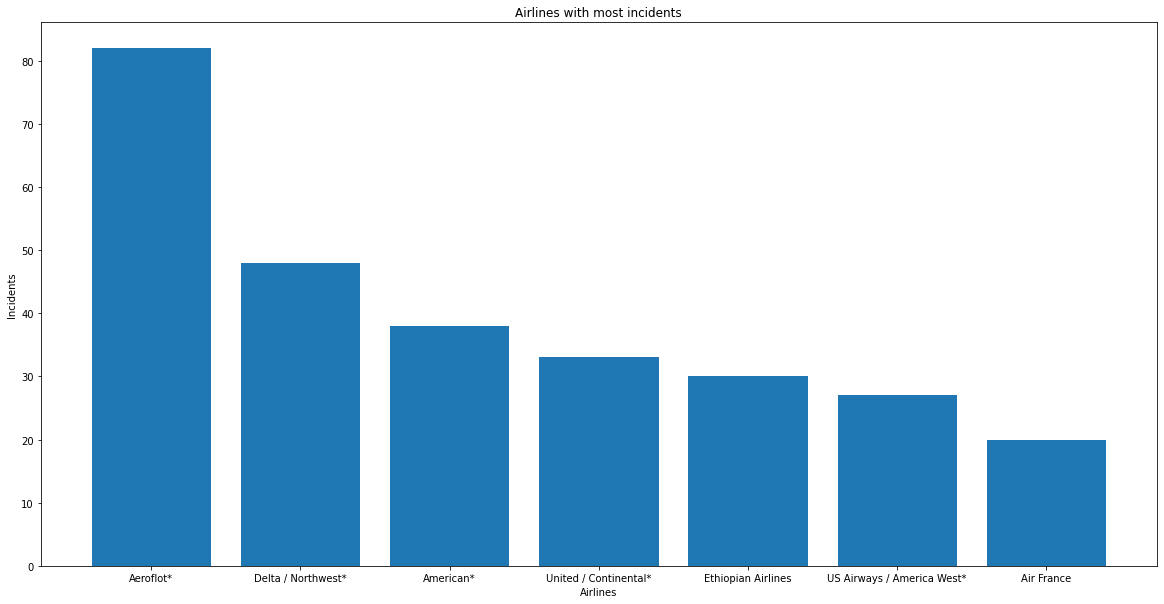

In [17]:
plt.bar('airline', 'incidents_85_14', data=most_inc)
plt.xlabel('Airlines')
plt.ylabel('Incidents')
plt.title('Airlines with most incidents')
plt.show()

In this project, we will be analysing the American airline incidents, since we have the Weather data from it.
To be specific, we have 3 hubs that are part of American airline hubs: KCLT, KPHL and KPHX.

In [18]:
cities

['KCLT',
 'KCQT',
 'KHOU',
 'KIND',
 'KJAX',
 'KMDW',
 'KNYC',
 'KPHL',
 'KPHX',
 'KSEA']

In [19]:
airports['KCLT']

,date,actual_mean_temp,actual_min_temp,actual_max_temp,average_min_temp,average_max_temp,record_min_temp,record_max_temp,record_min_temp_year,record_max_temp_year,actual_precipitation,average_precipitation,record_precipitation
0,2014-7-1,81,70,91,67,89,56,104,1919,2012,0.00,0.10,5.91
1,2014-7-2,85,74,95,68,89,56,101,2008,1931,0.00,0.10,1.53
2,2014-7-3,82,71,93,68,89,56,99,2010,1931,0.14,0.11,2.50
3,2014-7-4,75,64,86,68,89,55,99,1933,1955,0.00,0.10,2.63
4,2014-7-5,72,60,84,68,89,57,100,1967,1954,0.00,0.10,1.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2015-6-26,85,70,100,67,88,55,102,1979,1952,1.21,0.11,1.98
361,2015-6-27,82,71,92,67,88,56,103,2012,1954,0.55,0.11,1.86
362,2015-6-28,76,66,85,67,88,53,101,1968,1959,0.00,0.11,1.83
363,2015-6-29,73,59,87,67,88,54,104,1974,2012,0.00,0.11,2.39


In [20]:
airlines = pd.concat([airports['KCLT'], airports['KPHL'], airports['KPHX']], axis=0)
airlines

,date,actual_mean_temp,actual_min_temp,actual_max_temp,average_min_temp,average_max_temp,record_min_temp,record_max_temp,record_min_temp_year,record_max_temp_year,actual_precipitation,average_precipitation,record_precipitation
0,2014-7-1,81,70,91,67,89,56,104,1919,2012,0.00,0.10,5.91
1,2014-7-2,85,74,95,68,89,56,101,2008,1931,0.00,0.10,1.53
2,2014-7-3,82,71,93,68,89,56,99,2010,1931,0.14,0.11,2.50
3,2014-7-4,75,64,86,68,89,55,99,1933,1955,0.00,0.10,2.63
4,2014-7-5,72,60,84,68,89,57,100,1967,1954,0.00,0.10,1.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2015-6-26,98,89,107,81,106,62,122,1963,1990,0.00,0.00,0.07
361,2015-6-27,99,90,108,81,106,55,118,1965,1990,0.01,0.00,0.04
362,2015-6-28,99,87,110,81,106,59,118,1965,1990,0.00,0.01,0.26
363,2015-6-29,98,86,110,81,107,59,119,1913,2013,0.05,0.00,0.09


In [21]:
new_data = airlines.loc[:, ['date', 'average_precipitation']].copy()
new_data

,date,average_precipitation
0,2014-7-1,0.10
1,2014-7-2,0.10
2,2014-7-3,0.11
3,2014-7-4,0.10
4,2014-7-5,0.10
...,...,...
360,2015-6-26,0.00
361,2015-6-27,0.00
362,2015-6-28,0.01
363,2015-6-29,0.00


In [22]:
most_inc.loc[:, ['airline', 'incidents_85_14']]

,airline,incidents_85_14
1,Aeroflot*,82
19,Delta / Northwest*,48
11,American*,38
51,United / Continental*,33
22,Ethiopian Airlines,30
52,US Airways / America West*,27
5,Air France,20
